<a href="https://colab.research.google.com/github/dfklsna/sangwoo-Kim/blob/main/PM10_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 미세먼지(PM10)를 분석하기 위한 월별 시각화


## 1. 데이터 불러오기
-----

In [ ]:
import pandas as pd

# 파일 경로 설정
file_path1 = '/content/2023년 1월.xlsx'
file_path2 = '/content/2023년 2월.xlsx'
file_path3 = '/content/2023년 3월.xlsx'
file_path4 = '/content/2023년 4월.xlsx'
file_path5 = '/content/2023년 5월.xlsx'
file_path6 = '/content/2023년 6월.xlsx'
file_path7 = '/content/2023년 7월.xlsx'
file_path8 = '/content/2023년 8월.xlsx'
file_path9 = '/content/2023년 9월.xlsx'
file_path10 = '/content/2023년 10월.xlsx'
file_path11 = '/content/2023년 11월.xlsx'
file_path12 = '/content/2023년 12월.xlsx'
# 엑셀 파일 읽기
data1 = pd.read_excel(file_path1)
data2 = pd.read_excel(file_path2)
data3 = pd.read_excel(file_path3)
data4 = pd.read_excel(file_path4)
data5 = pd.read_excel(file_path5)
data6 = pd.read_excel(file_path6)
data7 = pd.read_excel(file_path7)
data8 = pd.read_excel(file_path8)
data9 = pd.read_excel(file_path9)
data10 = pd.read_excel(file_path10)
data11 = pd.read_excel(file_path11)
data12 = pd.read_excel(file_path12)

# 데이터 출력
print(data12.head())


      지역     망   측정소코드 측정소명        측정일시     SO2    CO      O3     NO2  PM10  \
0  서울 중구  도시대기  111121   중구  2023120101  0.0026  0.37  0.0245  0.0106  17.0   
1  서울 중구  도시대기  111121   중구  2023120102  0.0027  0.36  0.0269  0.0070  18.0   
2  서울 중구  도시대기  111121   중구  2023120103  0.0023  0.34  0.0268  0.0071  18.0   
3  서울 중구  도시대기  111121   중구  2023120104  0.0025  0.39  0.0243  0.0102  17.0   
4  서울 중구  도시대기  111121   중구  2023120105  0.0025  0.39  0.0208  0.0141  18.0   

   PM25             주소  
0  13.0  서울 중구 덕수궁길 15  
1  10.0  서울 중구 덕수궁길 15  
2  13.0  서울 중구 덕수궁길 15  
3  10.0  서울 중구 덕수궁길 15  
4  12.0  서울 중구 덕수궁길 15  


## 2. 전처리 과정
-----
2-1. PM10의 결측치 확인

In [ ]:
# 모든 데이터 결합
data_list = [data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12]
combined_data = pd.concat(data_list)

# 결측값 계산
missing_values = combined_data.isnull().sum()

# 결측치가 있는 컬럼만 필터링
missing_values = missing_values[missing_values > 0]

# 가장 긴 열 이름 길이 계산
max_col_length = max(len(col) for col in missing_values.index)

# 총 데이터 개수 계산
total_rows = len(combined_data)

# 결측값 계산
missing_values = combined_data.isnull().sum()

# 결측치가 있는 컬럼만 필터링
missing_values = missing_values[missing_values > 0]

# 결측값 비율 계산
missing_ratio = (missing_values / total_rows) * 100

# 가장 긴 열 이름 길이 계산
max_col_length = max(len(col) for col in missing_values.index)

# PM10의 결측값 계산
pm10_missing = combined_data['PM10'].isnull().sum()

# 총 데이터 개수 계산
total_rows = len(combined_data)

# 결측값 비율 계산
pm10_missing_ratio = (pm10_missing / total_rows) * 100

# 출력
max_col_length = len("PM10")  # "PM10" 길이에 맞춰 정렬
print(f"{'컬럼명':<{max_col_length}}  {'결측값 개수':>10}  {'결측값 비율 (%)':>15}")
print("-" * (max_col_length + 38))
print(f"{'PM10':<{max_col_length}}  {pm10_missing:>10}  {pm10_missing_ratio:>15.2f}")



컬럼명       결측값 개수       결측값 비율 (%)
------------------------------------------
PM10      250583             4.42


 2-2. 결측치 처리

In [ ]:
# 결측값 제거 전 데이터 크기 확인
print(f"결측값 제거 전 데이터 크기: {combined_data.shape}")

# PM10 결측값이 있는 행 제거
combined_data = combined_data.dropna(subset=['PM10'])

# 결측값 제거 후 데이터 크기 확인
print(f"결측값 제거 후 데이터 크기: {combined_data.shape}")


결측값 제거 전 데이터 크기: (5667289, 12)
결측값 제거 후 데이터 크기: (5416706, 12)


2-3. 측정일시 변환

In [ ]:
# '측정일시'를 datetime 형식으로 변환
combined_data['측정일시'] = pd.to_datetime(combined_data['측정일시'], format='%Y%m%d%H', errors='coerce')

# 변환된 데이터 확인
print(combined_data[['측정일시']].head())


                 측정일시
0 2023-01-01 01:00:00
1 2023-01-01 02:00:00
2 2023-01-01 03:00:00
3 2023-01-01 04:00:00
4 2023-01-01 05:00:00


2-4. 이상치 확인

In [ ]:
# PM10 데이터 기초 통계 확인
import matplotlib.pyplot as plt

print("PM10 기초 통계:")
print(combined_data['PM10'].describe())


PM10 기초 통계:
count    5.416706e+06
mean     3.708653e+01
std      3.261631e+01
min      0.000000e+00
25%      1.800000e+01
50%      2.900000e+01
75%      4.500000e+01
max      1.154000e+03
Name: PM10, dtype: float64


Upper limit: 200
Number of outliers above upper limit (200): 31195


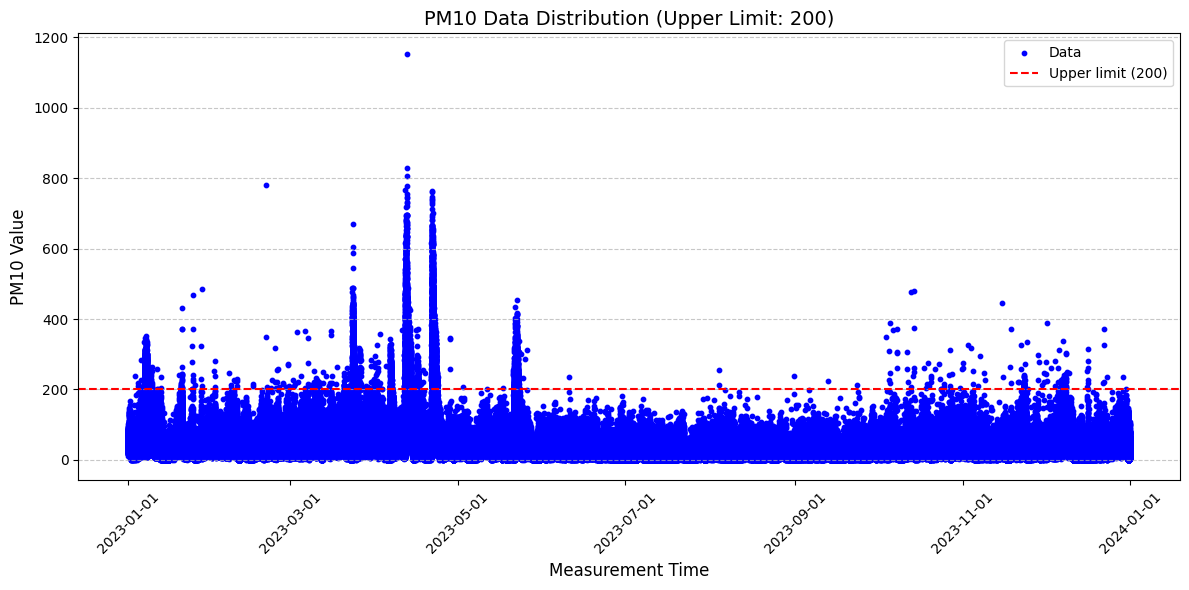

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 상한선 설정
upper_limit = 200
print(f"Upper limit: {upper_limit}")

# 이상치 데이터 개수 확인
outliers = combined_data[combined_data['PM10'] > upper_limit]
print(f"Number of outliers above upper limit ({upper_limit}): {len(outliers)}")

# 측정일시를 X축으로 설정한 산점도
plt.figure(figsize=(12, 6))
plt.scatter(combined_data['측정일시'], combined_data['PM10'], color='blue', s=10, label='Data')
plt.axhline(upper_limit, color='r', linestyle='--', label=f'Upper limit ({upper_limit})')
plt.title('PM10 Data Distribution (Upper Limit: 200)', fontsize=14)
plt.xlabel('Measurement Time', fontsize=12)
plt.ylabel('PM10 Value', fontsize=12)
plt.legend()

# X축 날짜 형식 설정
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



2-5. 이상치 처리(상한선으로 대체)

In [ ]:
# 이상치 상한선으로 대체
capped_data = combined_data.copy()
capped_data['PM10'] = capped_data['PM10'].apply(lambda x: min(x, 200))

# 대체 결과 확인
print("Original data stats:")
print(combined_data['PM10'].describe())

print("\nCapped data stats:")
print(capped_data['PM10'].describe())


Original data stats:
count    5.416706e+06
mean     3.708653e+01
std      3.261631e+01
min      0.000000e+00
25%      1.800000e+01
50%      2.900000e+01
75%      4.500000e+01
max      1.154000e+03
Name: PM10, dtype: float64

Capped data stats:
count    5.416706e+06
mean     3.664256e+01
std      2.922312e+01
min      0.000000e+00
25%      1.800000e+01
50%      2.900000e+01
75%      4.500000e+01
max      2.000000e+02
Name: PM10, dtype: float64


## 3. 시각화
-----
3-1. Line Plot

Monthly average PM10 values:
YearMonth
2023-01    44.955983
2023-02    43.733646
2023-03    63.816047
2023-04    61.515449
2023-05    37.167970
2023-06    26.562688
2023-07    24.123104
2023-08    21.694629
2023-09    21.417285
2023-10    28.846504
2023-11    29.726219
2023-12    35.734349
Freq: M, Name: PM10, dtype: float64


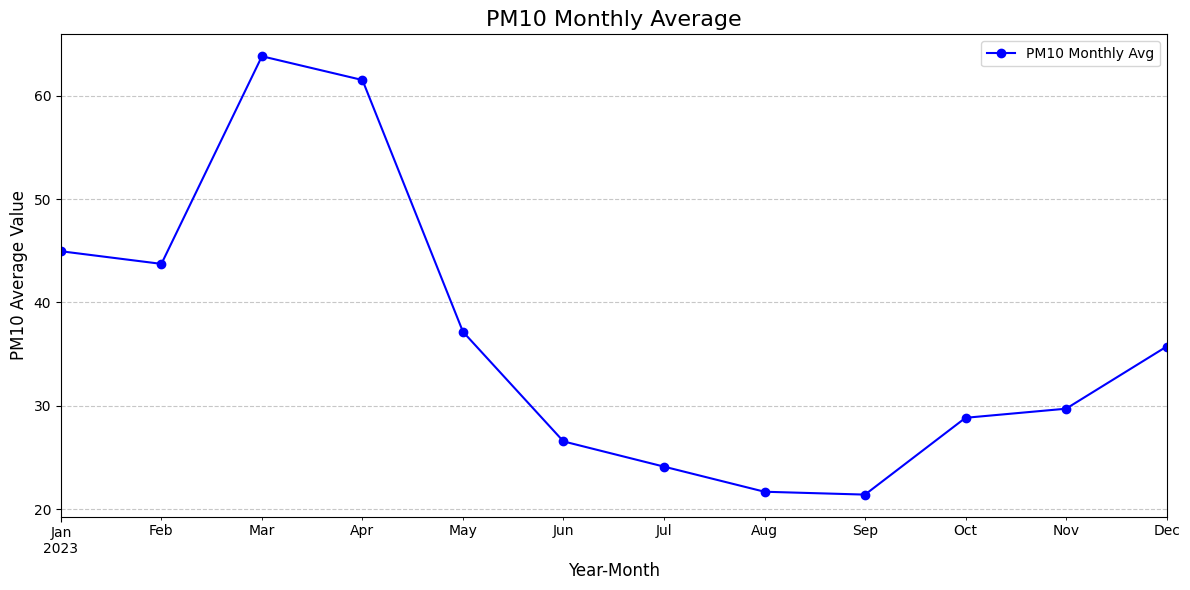

In [ ]:
import matplotlib.pyplot as plt

# '연-월' 컬럼 생성
capped_data['YearMonth'] = capped_data['측정일시'].dt.to_period('M')

# 월별 평균 PM10 계산
monthly_avg_pm10 = capped_data.groupby('YearMonth')['PM10'].mean()

# 월평균 데이터 확인
print("Monthly average PM10 values:")
print(monthly_avg_pm10)

# 월평균 시각화
plt.figure(figsize=(12, 6))
monthly_avg_pm10.plot(kind='line', marker='o', label='PM10 Monthly Avg', color='blue')
plt.title('PM10 Monthly Average', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('PM10 Average Value', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


3-2. Bar Chart

Monthly average PM10 values:
YearMonth
2023-01    44.955983
2023-02    43.733646
2023-03    63.816047
2023-04    61.515449
2023-05    37.167970
2023-06    26.562688
2023-07    24.123104
2023-08    21.694629
2023-09    21.417285
2023-10    28.846504
2023-11    29.726219
2023-12    35.734349
Freq: M, Name: PM10, dtype: float64


<Axes: xlabel='YearMonth'>

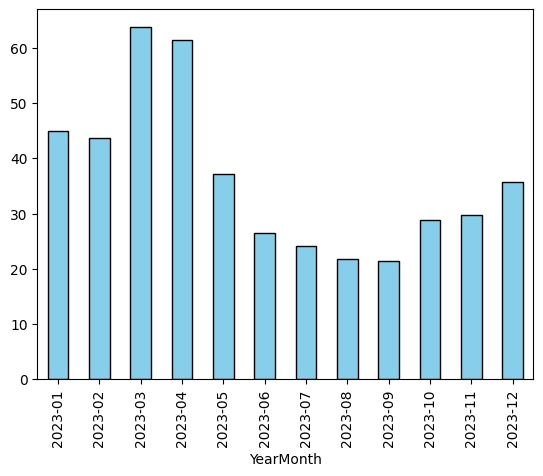

In [ ]:
# 월평균 PM10 막대 그래프
print("Monthly average PM10 values:")
print(monthly_avg_pm10)
monthly_avg_pm10.plot(kind='bar', color='skyblue', edgecolor='black')


3-3. Heatmap

Monthly average PM10 values:
YearMonth
2023-01    44.955983
2023-02    43.733646
2023-03    63.816047
2023-04    61.515449
2023-05    37.167970
2023-06    26.562688
2023-07    24.123104
2023-08    21.694629
2023-09    21.417285
2023-10    28.846504
2023-11    29.726219
2023-12    35.734349
Freq: M, Name: PM10, dtype: float64


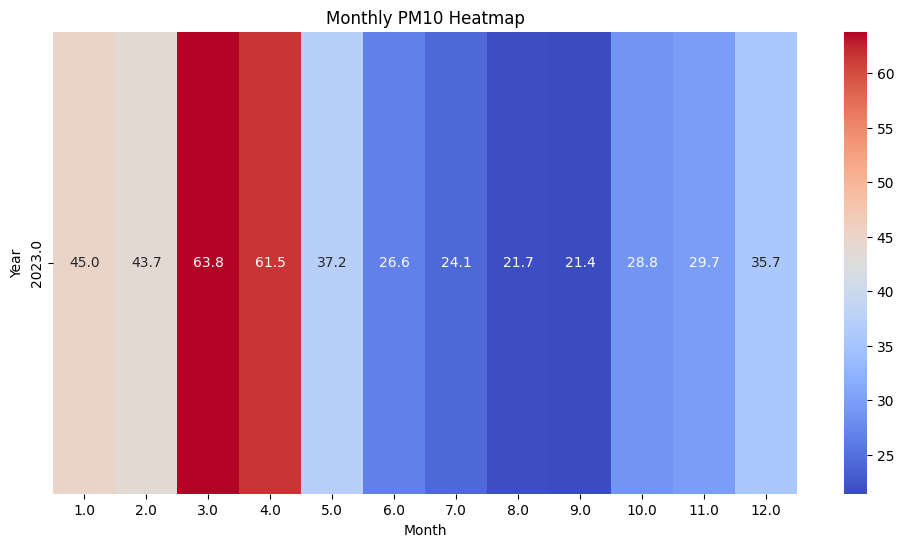

In [ ]:
import seaborn as sns
import pandas as pd

# 연도와 월로 데이터 피벗
heatmap_data = capped_data.pivot_table(index=capped_data['측정일시'].dt.year,
                                       columns=capped_data['측정일시'].dt.month,
                                       values='PM10',
                                       aggfunc='mean')

print("Monthly average PM10 values:")
print(monthly_avg_pm10)

# 히트맵 생성
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="coolwarm")
plt.title('Monthly PM10 Heatmap')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


## 4. 결론
-----

In [ ]:
# 가장 낮은 PM10 평균 값을 가진 월 찾기
lowest_avg_value = monthly_avg_pm10.min()
lowest_avg_month = monthly_avg_pm10.idxmin()

print(f"The lowest average PM10 value is {lowest_avg_value:.2f} in {lowest_avg_month}.")

# 기준 월을 중심으로 증감률 계산
baseline_value = monthly_avg_pm10[lowest_avg_month]
change_rate_from_baseline = (monthly_avg_pm10 - baseline_value) / baseline_value * 100

print("Change rates from the lowest month (%):")
print(change_rate_from_baseline)


The lowest average PM10 value is 21.42 in 2023-09.
Change rates from the lowest month (%):
YearMonth
2023-01    109.905144
2023-02    104.197896
2023-03    197.965154
2023-04    187.223370
2023-05     73.541931
2023-06     24.024534
2023-07     12.633808
2023-08      1.294955
2023-09      0.000000
2023-10     34.687960
2023-11     38.795458
2023-12     66.848172
Freq: M, Name: PM10, dtype: float64


In [ ]:
# 계절 정보를 추가
def get_season(date):
    month = date.month
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

capped_data['Season'] = capped_data['측정일시'].apply(get_season)

# 계절별 평균 PM10 계산
seasonal_avg = capped_data.groupby('Season')['PM10'].mean().sort_index()

print("Seasonal PM10 Averages:")
print(seasonal_avg)

Seasonal PM10 Averages:
Season
Autumn    26.696742
Spring    54.165006
Summer    24.105517
Winter    40.605855
Name: PM10, dtype: float64


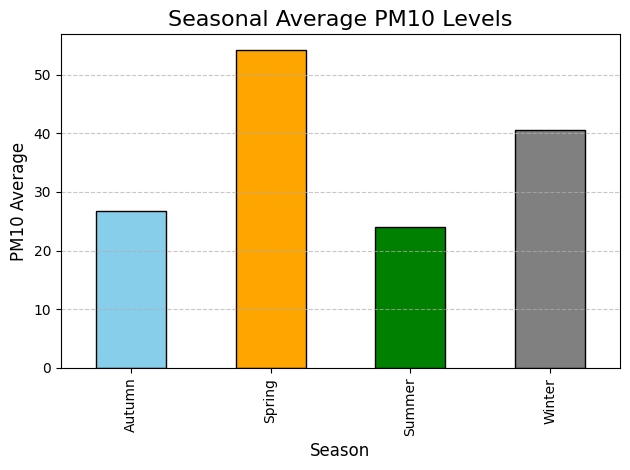

In [ ]:
# 계절별 평균 시각화
seasonal_avg.plot(kind='bar', color=['skyblue', 'orange', 'green', 'gray'], edgecolor='black')
plt.title('Seasonal Average PM10 Levels', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('PM10 Average', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
